<a href="https://colab.research.google.com/github/Rufaidah44/Classification_Models/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
#importing libraries
import pandas as pd
import numpy as np
from numpy import log, dot, e
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics


In [133]:
df = pd.read_csv('/content/drive/My Drive/Machine Learning/GPA_Dataset2.csv')
df.head()


,ip1,ip2,ip3,ip4,tepat
0,2.30,1.97,1.80,1.56,Tidak
1,1.81,1.68,1.57,1.86,Tidak
2,3.07,3.00,2.75,3.21,Tidak
3,2.71,2.33,2.61,1.98,Tidak
4,3.17,3.02,3.28,2.96,Tidak


In [134]:
df.rename(columns={"tepat": "graduated_on_time?","ip1":"GPA_1"
      ,"ip2":"GPA_2","ip3":"GPA_3","ip4":"GPA_4"}, inplace=True)
df.columns

Index(['GPA_1', 'GPA_2', 'GPA_3', 'GPA_4', 'graduated_on_time?'], dtype='object')

In [135]:
#transfer values to 0 or 1
from sklearn.preprocessing import LabelEncoder
# encoder last column 
enc= LabelEncoder()
df.iloc[:,[-1]]= df.iloc[:,[-1]].apply(enc.fit_transform).astype(float)
df = df.astype(float)


In [136]:
df.head()

,GPA_1,GPA_2,GPA_3,GPA_4,graduated_on_time?
0,2.30,1.97,1.80,1.56,0.0
1,1.81,1.68,1.57,1.86,0.0
2,3.07,3.00,2.75,3.21,0.0
3,2.71,2.33,2.61,1.98,0.0
4,3.17,3.02,3.28,2.96,0.0


In [137]:
df.describe()

,GPA_1,GPA_2,GPA_3,GPA_4,graduated_on_time?
count,401.000000,401.000000,401.000000,401.000000,401.000000
mean,3.056259,3.048379,3.137631,3.152768,0.670823
std,0.403791,0.523141,0.417795,0.476645,0.470501
min,0.830000,0.950000,0.550000,0.900000,0.000000
25%,2.880000,2.920000,3.010000,3.060000,0.000000
50%,3.120000,3.190000,3.220000,3.280000,1.000000
75%,3.320000,3.350000,3.390000,3.450000,1.000000
max,3.860000,3.770000,3.820000,3.800000,1.000000


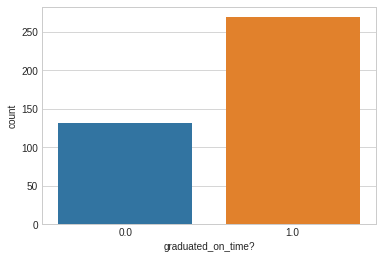

In [138]:
sns.countplot(x=df['graduated_on_time?'], data=df )
plt.show()

In [139]:
print(df['graduated_on_time?'].value_counts())


1.0    269
0.0    132
Name: graduated_on_time?, dtype: int64


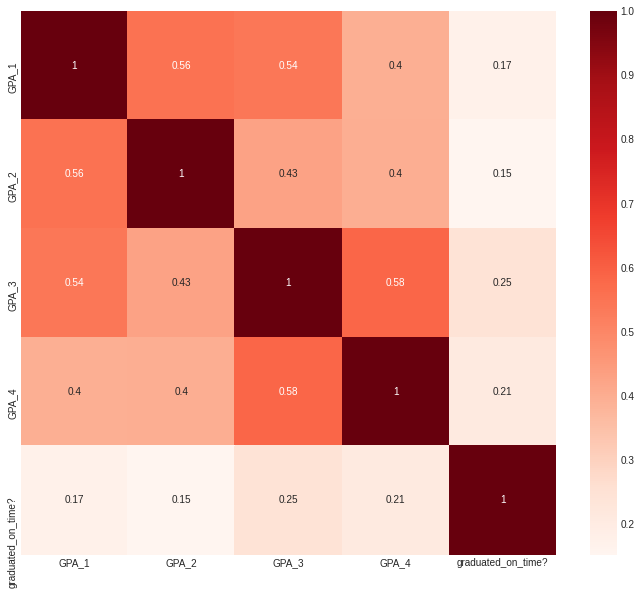

In [140]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f102d9f5f98>,
      dtype=object)

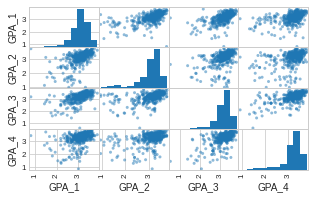

In [141]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,0:4], figsize=(5,3))

<Figure size 432x288 with 0 Axes>

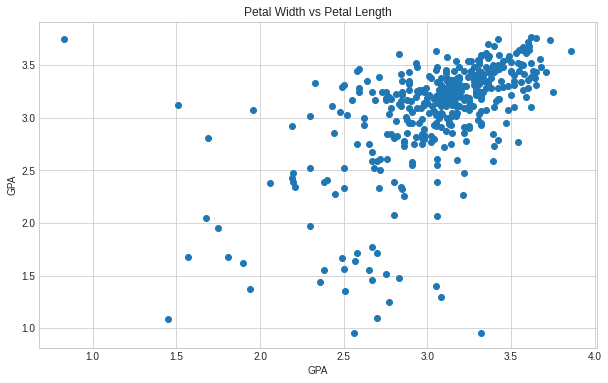

In [142]:
plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.title('Petal Width vs Petal Length')
plt.xlabel('GPA')
plt.ylabel('GPA')
plt.show()

<Figure size 432x288 with 0 Axes>

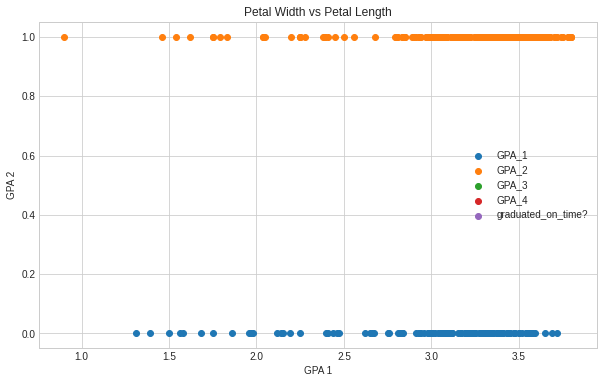

In [143]:
plt.clf()
plt.figure(figsize = (10, 6))
names = df.columns
colors = ['b','r','g']
label = (df['graduated_on_time?']).astype(np.int)
plt.title('Petal Width vs Petal Length')
plt.xlabel('GPA 1')
plt.ylabel("GPA 2")
for i in range(len(names)):
    bucket = df[df['graduated_on_time?'] == i]
    bucket = bucket.iloc[:,[3,4]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

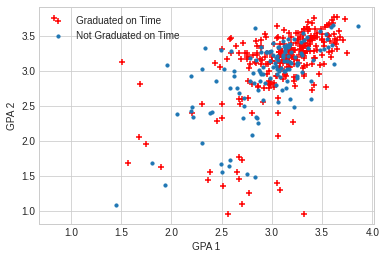

In [144]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
pos , neg = (y==1).reshape(401,1) , (y==0).reshape(401,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("GPA 1")
plt.ylabel("GPA 2")
plt.legend(["Graduated on Time","Not Graduated on Time"],loc=0)

In [145]:
#select X features and y
X = df.iloc[:,[0,1,2,3]]
y = df.iloc[:,-1]
print(y.shape)
X

(401,)


,GPA_1,GPA_2,GPA_3,GPA_4
0,2.30,1.97,1.80,1.56
1,1.81,1.68,1.57,1.86
2,3.07,3.00,2.75,3.21
3,2.71,2.33,2.61,1.98
4,3.17,3.02,3.28,2.96
...,...,...,...,...
396,3.07,3.04,3.39,3.55
397,3.29,3.22,3.33,3.68
398,3.31,3.25,3.44,3.52
399,3.44,3.35,3.50,3.50


In [146]:
#build classification class
from numpy.random import rand
np.seterr(divide = 'ignore') 
np.seterr(divide = 'warn') 


class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + np.exp(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        #print((predict_1 + predict_0)/len(X))
        error = (-y * np.log(self.sigmoid(z))) - ((1-y)*np.log(1- self.sigmoid(z)))
        return -sum(predict_1 + predict_0) / len(X)
    
    def cost_function2(self,weights,X,y,lambda_):
      #weights = weights.reshape(210,1)
      m = len(X)
      z = dot(X, weights)
      #theta = theta.reshape(n,1)
      infunc1 = - y * (np.log(self.sigmoid(z))) - ((1-y)*(np.log(1 - self.sigmoid(z))))
      infunc2 = (lambda_*np.sum(weights[1:]**2))/(2*m)
      j = np.sum(infunc1) / + infunc2
      return j

    def compute_gradient(self,weights,X,y,lambda_):
      m = len(X)
      weights = np.zeros(X.shape[1])
      z = dot(X, weights)

      gradient = np.zeros(n).reshape(n,)
      weights = weights.reshape(n,1)
      infunc1 = self.sigmoid(z)-y
      gradient_in = np.dot(X.transpose(),infunc1)/m
      gradient[0] = gradient_in[0,0] # theta(0)
      gradient[1:] = gradient_in[1:,0]+(lambda_*weights[1:,]/m).reshape(n-1,) # theta(j) ; j>0
      gradient = gradient.flatten()
      return gradient

      

    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = np.zeros(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    

    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [148]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, epochs=100, lr=0.05)
y_pred = logreg.predict(X_test)

In [149]:
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))
metrics.accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.64      1.00      0.78        52

    accuracy                           0.64        81
   macro avg       0.32      0.50      0.39        81
weighted avg       0.41      0.64      0.50        81

-------------------------------------------------------
Confusion Matrix

[[ 0 29]
 [ 0 52]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6419753086419753

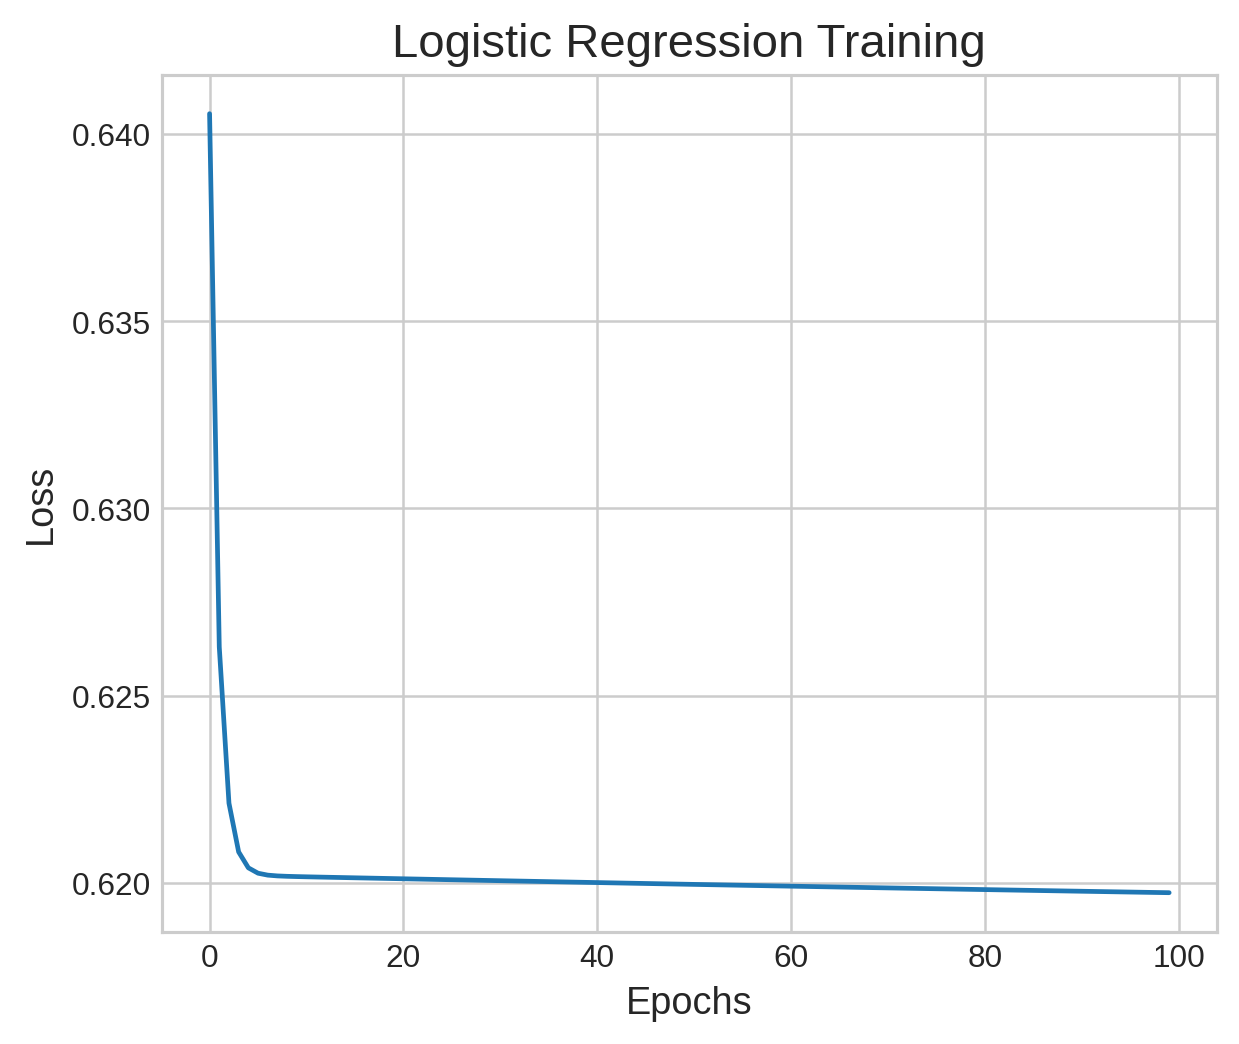

In [150]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (6,5)
plt.plot(logreg.loss)
plt.title('Logistic Regression Training', fontSize=15)
plt.xlabel('Epochs', fontSize=12)
plt.ylabel('Loss', fontSize=12)
plt.show()

In [151]:
# import library FeatureMapping
from sklearn.preprocessing import PolynomialFeatures

# We also add one column of ones to interpret theta 0 (x with power of 0 = 1) by 
#include_bias as True
pf = PolynomialFeatures(degree = 6, include_bias = True)
x_poly = pf.fit_transform(X)
pd.DataFrame(x_poly).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209
0,1.0,2.30,1.97,1.80,1.56,5.2900,4.5310,4.1400,3.5880,3.8809,3.5460,3.0732,3.2400,2.8080,2.4336,12.167000,10.421300,9.522000,8.252400,8.926070,8.155800,7.068360,7.452000,6.458400,5.597280,7.645373,6.985620,6.054204,6.382800,5.531760,4.794192,5.832000,5.054400,4.380480,3.796416,27.984100,23.968990,21.900600,18.980520,20.529961,...,33.887075,47.564626,41.222676,35.726319,30.962810,26.834435,43.460064,37.665389,32.643337,28.290892,24.518773,21.249603,58.451728,53.407671,46.286648,48.798887,42.292369,36.653386,44.587815,38.642773,33.490404,29.025016,40.740136,35.308118,30.600369,26.520320,22.984277,37.224490,32.261224,27.959728,24.231764,21.000862,18.200747,34.012224,29.477261,25.546959,22.140698,19.188605,16.630124,14.412774
1,1.0,1.81,1.68,1.57,1.86,3.2761,3.0408,2.8417,3.3666,2.8224,2.6376,3.1248,2.4649,2.9202,3.4596,5.929741,5.503848,5.143477,6.093546,5.108544,4.774056,5.655888,4.461469,5.285562,6.261876,4.741632,4.431168,5.249664,4.141032,4.905936,5.812128,3.869893,4.584714,5.431572,6.434856,10.732831,9.961965,9.309693,11.029318,9.246465,...,32.872745,18.475086,21.887681,25.930629,30.720363,36.394825,17.265408,20.454559,24.232790,28.708911,34.011830,40.294270,22.483074,21.010968,24.891975,19.635250,23.262143,27.558972,18.349608,21.739027,25.754516,30.511719,17.148146,20.315638,24.068208,28.513928,33.780832,16.025351,18.985447,22.492313,26.646945,31.568992,37.400207,14.976072,17.742353,21.019602,24.902204,29.501974,34.951384,41.407372
2,1.0,3.07,3.00,2.75,3.21,9.4249,9.2100,8.4425,9.8547,9.0000,8.2500,9.6300,7.5625,8.8275,10.3041,28.934443,28.274700,25.918475,30.253929,27.630000,25.327500,29.564100,23.216875,27.100425,31.633587,27.000000,24.750000,28.890000,22.687500,26.482500,30.912300,20.796875,24.275625,28.336275,33.076161,88.828740,86.803329,79.569718,92.879562,84.824100,...,913.894328,526.732852,614.840892,717.687005,837.736468,977.866931,482.838447,563.604151,657.879755,767.925095,896.378020,1046.317617,729.000000,668.250000,780.030000,612.562500,715.027500,834.632100,561.515625,655.441875,765.079425,893.056347,514.722656,600.821719,701.322806,818.634985,955.570291,471.829102,550.753242,642.879239,750.415403,875.939434,1022.460212,432.510010,504.857139,589.305969,687.880786,802.944481,937.255194,1094.032426
3,1.0,2.71,2.33,2.61,1.98,7.3441,6.3143,7.0731,5.3658,5.4289,6.0813,4.6134,6.8121,5.1678,3.9204,19.902511,17.111753,19.168101,14.541318,14.712319,16.480323,12.502314,18.460791,14.004738,10.624284,12.649337,14.169429,10.749222,15.872193,12.040974,9.134532,17.779581,13.487958,10.232244,7.762392,53.935805,46.372851,51.945554,39.406972,39.870384,...,114.202787,293.013238,222.285904,168.630686,127.926727,97.047862,328.225129,248.998374,188.895318,143.299896,108.710266,82.469857,160.005727,179.233883,135.970532,200.772718,152.310338,115.545774,224.899912,170.613726,129.431103,98.189112,251.926511,191.116663,144.985055,109.988662,83.439675,282.200941,214.083473,162.408152,123.206184,93.466760,70.905818,316.113501,239.810242,181.925011,138.012077,104.698817,79.426689,60.254730
4,1.0,3.17,3.02,3.28,2.96,10.0489,9.5734,10.3976,9.3832,9.1204,9.9056,8.9392,10.7584,9.7088,8.7616,31.855013,30.347678,32.960392,29.744744,28.911668,31.400752,28.337264,34.104128,30.776896,27.774272,27.543608,29.914912,26.996384,32.490368,29.320576,26.460032,35.287552,31.844864,28.738048,25.934336,100.980391,96.202139,104.484443,94.290838,91.649988,...,749.804912,1108.055669,999.952677,902.396318,814.357653,734.908126,1203.451190,1086.041318,980.086067,884.467915,798.178362,720.307302,758.650342,823.964609,743.577818,894.901960,807.594452,728.804749,971.946500,877.122451,791.549529,714.325185,1055.624013,952.636304,859.696177,775.823379,700.133293,1146.505550,1034.651350,933.709755,8

In [152]:
y = y.values.reshape(-1,1)
# hyperparameters
m,n = x_poly.shape
print(m,n)
# define theta as zero
theta = np.zeros(n)

# define hyperparameter λ
lambda_array = [0, 1, 10, 100]


import scipy.optimize as opt

def predict(theta, X):
    sigValue = logreg.sigmoid(X @ theta.T)
    p = sigValue >= 0.5
    return p

from sklearn.metrics import confusion_matrix

# Function for accuracy
def acc(confusion_matrix):
    t = confusion_matrix[0][0] + confusion_matrix[1][1]
    f = confusion_matrix[0][1] + confusion_matrix[1][0]
    ac = t/(t+f)
    return (t,f,ac)

for i in range(0,len(lambda_array)):
    # Train
    print('======================================== Iteration {} ===================================='.format(i))
    optimized = opt.minimize(fun = logreg.cost_function2, x0 = theta, args = (x_poly, y,lambda_array[i]), method = 'TNC', jac=logreg.compute_gradient)
    new_theta = optimized.x


    # Prediction
    y_pred_train = predict(new_theta,x_poly)
    cm_train = confusion_matrix(y,y_pred_train)
    cm_train2 = confusion_matrix(y,y_pred_train)

    t_train,f_train,acc_train = acc(cm_train)
    print('With lambda = {}, {} correct, {} wrong ==========> accuracy = {}%'.format(lambda_array[i],t_train,f_train,acc_train*100))


401 210
======================================== Iteration 0 ====================================


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


With lambda = 0, 269 correct, 132 wrong ==========> accuracy = 67.08229426433915%
======================================== Iteration 1 ====================================
With lambda = 1, 269 correct, 132 wrong ==========> accuracy = 67.08229426433915%
======================================== Iteration 2 ====================================
With lambda = 10, 269 correct, 132 wrong ==========> accuracy = 67.08229426433915%
======================================== Iteration 3 ====================================
With lambda = 100, 269 correct, 132 wrong ==========> accuracy = 67.08229426433915%


In [153]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


[[ 5 24]
 [ 0 52]]
              precision    recall  f1-score   support

         0.0       1.00      0.17      0.29        29
         1.0       0.68      1.00      0.81        52

    accuracy                           0.70        81
   macro avg       0.84      0.59      0.55        81
weighted avg       0.80      0.70      0.63        81



In [154]:
#Linear Persepton Model

from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
Perceptron()
y_pred_per = clf.predict(X_test)
clf.score(X_test, y_test)
print(confusion_matrix(y_test, y_pred_per))
print(classification_report(y_test,y_pred_per))
print(clf.score(X_test, y_test))



[[ 0 29]
 [ 0 52]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        29
         1.0       0.64      1.00      0.78        52

    accuracy                           0.64        81
   macro avg       0.32      0.50      0.39        81
weighted avg       0.41      0.64      0.50        81

0.6419753086419753


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
from sklearn.metrics import accuracy_score

class Perceptron:
  
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
    
  #model  
  def model(self, x):
    return 1.0 if (np.dot(self.w, x) >= self.b) else 0.0
  
  #predictor to predict on the data based on w
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 10, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      for x, y in zip(X, Y):
        print(x)
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #checkpoint (Save the weights and b value)
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)

In [156]:
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,-1].values
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

(401,)


In [157]:

perceptron = Perceptron()
#epochs = 10000 and lr = 0.3
wt_matrix = perceptron.fit(X_train, y_train, 10, 0.3)

#making predictions on test data
Y_pred_test = perceptron.predict(X_test)

#checking the accuracy of the model
print(accuracy_score(Y_pred_test, y_test))

[2.8  2.81 2.65 3.28]
[3.86 3.64 3.49 3.45]
[3.59 3.2  3.38 3.15]
[2.86 2.26 2.84 3.2 ]
[2.87 3.01 3.16 3.1 ]
[2.99 3.28 3.09 3.45]
[2.89 3.32 3.45 3.25]
[2.58 1.72 2.95 2.62]
[2.7  1.1  3.32 2.9 ]
[3.53 3.62 3.65 3.5 ]
[3.31 3.51 3.45 3.62]
[2.59 3.25 3.21 3.22]
[3.5  3.22 3.33 3.48]
[3.65 3.44 3.34 3.45]
[3.06 3.16 3.48 3.52]
[3.37 3.59 3.68 3.32]
[3.41 3.46 3.53 3.63]
[1.45 1.09 2.59 2.66]
[3.04 2.8  2.94 3.47]
[3.03 3.11 3.29 3.43]
[3.38 3.28 3.39 3.34]
[2.97 2.85 3.05 2.97]
[3.18 3.12 3.2  3.23]
[3.54 2.77 3.8  3.68]
[2.97 3.27 2.9  2.83]
[2.86 2.77 2.67 3.33]
[3.48 3.3  3.14 3.22]
[3.33 3.25 3.17 3.16]
[3.35 3.08 3.18 3.09]
[2.49 3.29 2.99 2.93]
[3.45 3.29 3.64 3.39]
[3.28 3.48 3.42 3.39]
[3.12 3.   2.87 3.4 ]
[3.32 2.95 3.47 3.5 ]
[2.2  2.48 2.51 1.39]
[2.84 3.42 3.38 3.52]
[3.08 3.11 3.18 3.42]
[3.42 3.18 3.18 3.06]
[3.24 2.91 3.14 3.2 ]
[3.19 3.26 3.52 3.3 ]
[3.13 3.3  3.06 3.17]
[3.13 3.   3.33 2.47]
[3.25 3.19 3.35 3.33]
[3.   3.14 3.28 3.25]
[3.21 2.27 3.   2.45]
[3.5  3.45

0.6296296296296297


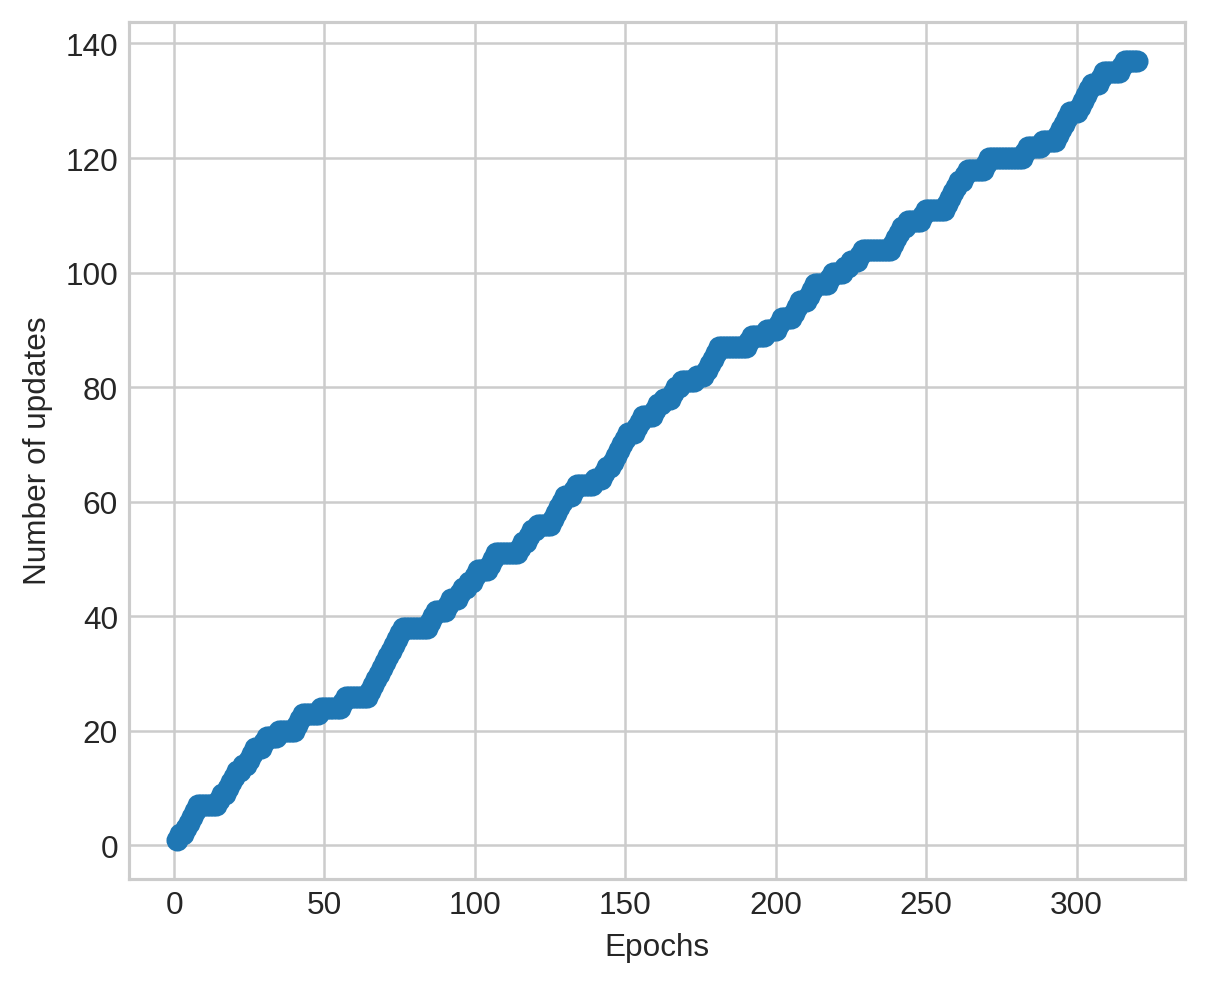

In [158]:
#Perceptron Model

class Perceptron(object):
  def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rand = np.random.RandomState(self.random_state)
    self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for x, target in zip(X, y):
        update = self.learning_rate * (target - self.predict(x))
        self.weights[1:] += update * x
        self.weights[0] += update
        errors += int(update != 0.0)
        self.errors_.append(errors)
      return self

  def net_input(self, X):
    z = np.dot(X, self.weights[1:]) + self.weights[0]
    return z

  def predict(self, X):
    return np.where(self.net_input(X) >= 0, 1, -1)

per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
model = per.fit(X_train, y_train)
pre = model.predict(X_test)
print(accuracy_score(y_test,pre))

plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [159]:
#Naive Bayes

# Importing library 
import math 
import random 
import csv 
  
  
# the categorical class names are changed to numberic data 
# eg: yes and no encoded to 1 and 0 
              
  
# Splitting the data 
def splitting(mydata, ratio): 
    train_num = int(len(mydata) * ratio) 
    train = [] 
    # initally testset will have all the dataset  
    test = list(mydata) 
    while len(train) < train_num: 
        # index generated randomly from range 0  
        # to length of testset 
        index = random.randrange(len(test)) 
        # from testset, pop data rows and put it in train 
        train.append(test.pop(index)) 
    return train, test 
  
  
# Group the data rows under each class yes or  
# no in dictionary eg: dict[yes] and dict[no]  
def groupUnderClass(mydata): 
      dict = {} 
      for i in range(len(mydata)): 
          if (mydata[i][-1] not in dict): 
              dict[mydata[i][-1]] = [] 
          dict[mydata[i][-1]].append(mydata[i]) 
      return dict
  
  
# Calculating Mean 
def mean(numbers): 
    return sum(numbers) / float(len(numbers)) 
  
# Calculating Standard Deviation 
def std_dev(numbers): 
    avg = mean(numbers) 
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1) 
    return math.sqrt(variance) 
  
def MeanAndStdDev(mydata): 
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)] 
    # eg: list = [ [a, b, c], [m, n, o], [x, y, z]] 
    # here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3 
    # delete summaries of last class 
    del info[-1] 
    return info 
  
# find Mean and Standard Deviation under each class 
def MeanAndStdDevForClass(mydata): 
    info = {} 
    dict = groupUnderClass(mydata) 
    for classValue, instances in dict.items(): 
        info[classValue] = MeanAndStdDev(instances) 
    return info 
  
  
# Calculate Gaussian Probability Density Function 
def calculateGaussianProbability(x, mean, stdev): 
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2)))) 
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo 
  
  
# Calculate Class Probabilities 
def calculateClassProbabilities(info, test): 
    probabilities = {} 
    for classValue, classSummaries in info.items(): 
        probabilities[classValue] = 1
        for i in range(len(classSummaries)): 
            mean, std_dev = classSummaries[i] 
            x = test[i] 
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev) 
    return probabilities 
  
  
# Make prediction - highest probability is the prediction 
def predict(info, test): 
    probabilities = calculateClassProbabilities(info, test) 
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items(): 
        if bestLabel is None or probability > bestProb: 
            bestProb = probability 
            bestLabel = classValue 
    return bestLabel 
  
  
# returns predictions for a set of examples 
def getPredictions(info, test): 
    predictions = [] 
    for i in range(len(test)): 
        result = predict(info, test[i]) 
        predictions.append(result) 
    return predictions 
  
# Accuracy score 
def accuracy_rate(test, predictions): 
    correct = 0
    for i in range(len(test)): 
        if test[i][-1] == predictions[i]: 
            correct += 1
    return (correct / float(len(test))) * 100.0
  
  
# driver code  
  
# load the file and store it in mydata list 
mydata = df.iloc[1:,:].values

mydata = list(mydata) 
#mydata = encode_class(mydata) 
for i in range(len(mydata)): 
    mydata[i] = [float(x) for x in mydata[i]] 
  
      
# split ratio = 0.8  
# 70% of data is training data and 30% is test data used for testing 
ratio = 0.8
train_data, test_data = splitting(mydata, ratio)

print('Total number of examples are: ', len(mydata)) 
print('Out of these, training examples are: ', len(train_data)) 
print("Test examples are: ", len(test_data)) 
  
# prepare model 
info = MeanAndStdDevForClass(train_data) 
  
# test model 
predictions = getPredictions(info, test_data) 
accuracy = accuracy_rate(test_data, predictions) 
print("Accuracy of your model is: ", accuracy) 

Total number of examples are:  400
Out of these, training examples are:  320
Test examples are:  80
Accuracy of your model is:  63.74999999999999


In [160]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7160493827160493


In [161]:
#Support Vectro Classifier 
from sklearn.svm import SVC
svclassifier = SVC(kernel= 'rbf',C = 5)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10 19]
 [ 4 48]]
              precision    recall  f1-score   support

         0.0       0.71      0.34      0.47        29
         1.0       0.72      0.92      0.81        52

    accuracy                           0.72        81
   macro avg       0.72      0.63      0.64        81
weighted avg       0.72      0.72      0.68        81



In [162]:
import numpy as np
import pandas as pd


class GaussianDiscriminantAnalysis:
    def __init__(self):
        pass

    def initialize_data(self, X_, y_):
        self.n_features_ = X_.shape[1]

        self.classes_ = np.unique(y_)
        self.classes_.sort()

        self.means_ = np.zeros((self.classes_.size, self.n_features_))
        self.priors_ = np.zeros(self.classes_.size)

    def fit(self, X, y):
        pass

    def predict(self, X):
        pass

    def proba_score(self, X, mean, prior):
        pass

    def get_values(self, data):
        if (isinstance(data, pd.DataFrame) or isinstance(data, pd.Series)):
            return data.values
        return data


class LinearDiscriminantAnalysis(GaussianDiscriminantAnalysis):
    def fit(self, X, y):
        X_ = self.get_values(X)
        y_ = self.get_values(y)

        self.initialize_data(X_, y_)

        for index, y_class in enumerate(self.classes_):
            self.means_[index] = np.mean(X_[y_ == y_class], axis=0)
            self.priors_[index] = y_[y_ == y_class].size / y_.size

        self.cov_matrix_ = self.calc_single_covariance(X_, y_)
        self.cov_matrix_det_ = np.sqrt(np.linalg.det(self.cov_matrix_))
        self.cov_matrix_inv = np.linalg.pinv(self.cov_matrix_)

    def predict(self, X):
        X_ = self.get_values(X)
        probs = np.zeros((X_.shape[0], self.priors_.size))
        for index, _ in enumerate(self.classes_):
            probs[:, index] = self.proba_score(
                X_, self.means_[index], self.priors_[index])

        probs_arg_max = np.argmax(probs, axis=1)
        return probs_arg_max

    def proba_score(self, X, mean, prior):
        Xm = X - mean
        Xm_cov = (Xm @ self.cov_matrix_inv) * Xm
        Xm_cov_sum = Xm_cov.sum(axis=1)
        return -0.5*Xm_cov_sum + np.log(prior)

    def calc_single_covariance(self, X, y):
        cov = np.zeros(shape=(X.shape[1], X.shape[1]))
        for i, y_class in enumerate(np.unique(y)):
            X_class_members = X[y == y_class]
            cov += (X_class_members -
                    self.means_[i]).T @ (X_class_members - self.means_[i])

        cov /= X.shape[0]
        return cov




In [163]:
import numpy as np
import pandas as pd



model_linear = LinearDiscriminantAnalysis()
model_linear.fit(X_train, y_train)
y_pred = model_linear.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))



[[ 6 23]
 [ 2 50]]
              precision    recall  f1-score   support

         0.0       0.75      0.21      0.32        29
         1.0       0.68      0.96      0.80        52

    accuracy                           0.69        81
   macro avg       0.72      0.58      0.56        81
weighted avg       0.71      0.69      0.63        81



In [164]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 6 23]
 [ 2 50]]
              precision    recall  f1-score   support

         0.0       0.75      0.21      0.32        29
         1.0       0.68      0.96      0.80        52

    accuracy                           0.69        81
   macro avg       0.72      0.58      0.56        81
weighted avg       0.71      0.69      0.63        81

